## Random Walk Generation

In [2]:
import numpy as np
import pandas as pd 
import edhec_risk_kit as erk
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
# Gbm = geometric brownian motion(How long, how many, mu, sigma, steps per year, initial stockprice

def gbm(n_years = 10, n_scenarios = 1000, mu=0.07, sigma = 0.15, steps_per_year = 12, s_0 = 100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year) # make it an integer for format 
    xi = np.random.normal(size=(n_steps, n_scenarios)) # generating a matrix as many rows as there are steps, and as many columns as there are scenarios 
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # Returns to prices:
    prices = s_0*(1+rets).cumprod()
    return prices
    

In [21]:
p = gbm(10, n_scenarios = 3)
p

,0,1,2
0,103.519586,101.529029,100.433973
1,100.363156,102.552407,108.850926
2,105.218902,119.037934,113.879054
3,97.303484,115.114583,118.501391
4,92.690122,123.006314,116.331074
...,...,...,...
115,133.673456,145.525060,209.354122
116,138.455115,152.517220,208.373014
117,145.278793,148.974212,216.518358
118,142.909242,143.564205,223.265612


In [22]:
p.shape

(120, 3)

In [23]:
p.head()

,0,1,2
0,103.519586,101.529029,100.433973
1,100.363156,102.552407,108.850926
2,105.218902,119.037934,113.879054
3,97.303484,115.114583,118.501391
4,92.690122,123.006314,116.331074


<AxesSubplot:>

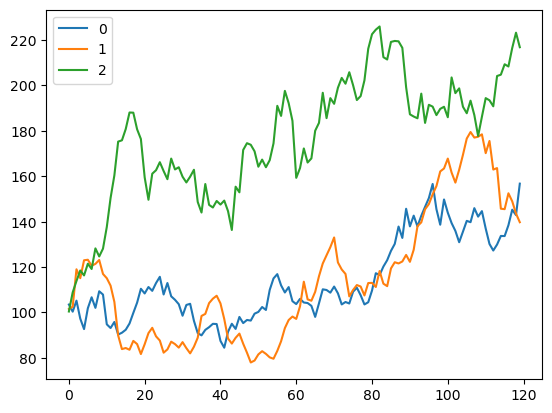

In [24]:
p.plot()

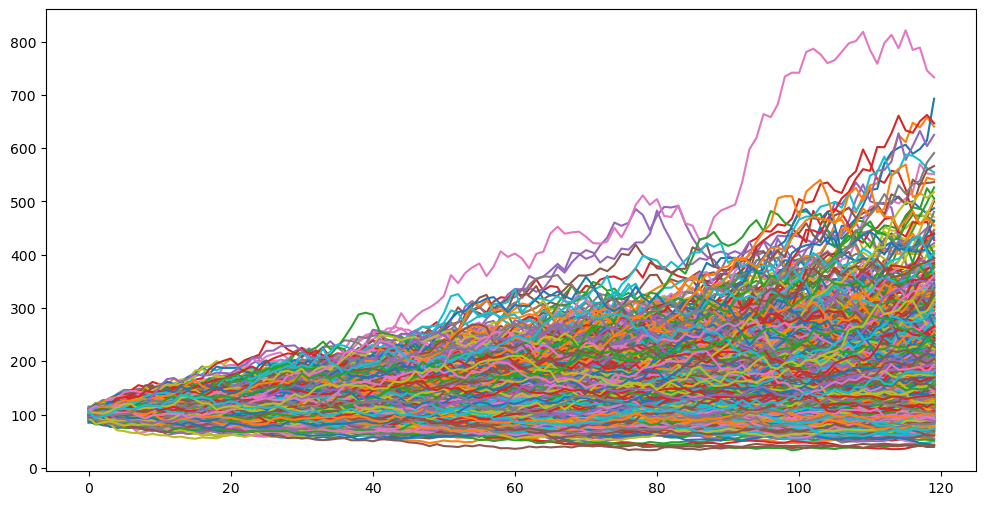

In [26]:
p = gbm(n_years=10, n_scenarios = 1000).plot(figsize=(12,6), legend=False)

In [27]:
# Do this to just save the data to be more efficient, we want random number generators to run fast
p = gbm(n_years=10, n_scenarios = 1000)

In [34]:
def gbm0(n_years = 10, n_scenarios = 1000, mu=0.07, sigma = 0.15, steps_per_year = 12, s_0 = 100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year) # make it an integer for format 
    xi = np.random.normal(size=(n_steps, n_scenarios)) # generating a matrix as many rows as there are steps, and as many columns as there are scenarios 
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # Returns to prices:
    prices = s_0*(1+rets).cumprod()
    return prices
    
    
def gbm(n_years = 10, n_scenarios = 1000, mu=0.07, sigma = 0.15, steps_per_year = 12, s_0 = 100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year) # make it an integer for format 
    rets_p1 = np.random.normal(loc = (1+mu*dt), scale = (sigma*np.sqrt(dt)), size=(n_steps, n_scenarios)) # generating a matrix as many rows as there are steps, and as many columns as there are scenarios 
    # Returns to prices:
    prices = s_0*pd.DataFrame(rets_p1).cumprod()
    return prices
    

In [29]:
%timeit gbm0(n_years=5, n_scenarios=1000)

3.56 ms ± 568 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [35]:
%timeit gbm(n_years=5, n_scenarios=1000)

2.03 ms ± 51.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
# We have halved the time of the code

<AxesSubplot:>

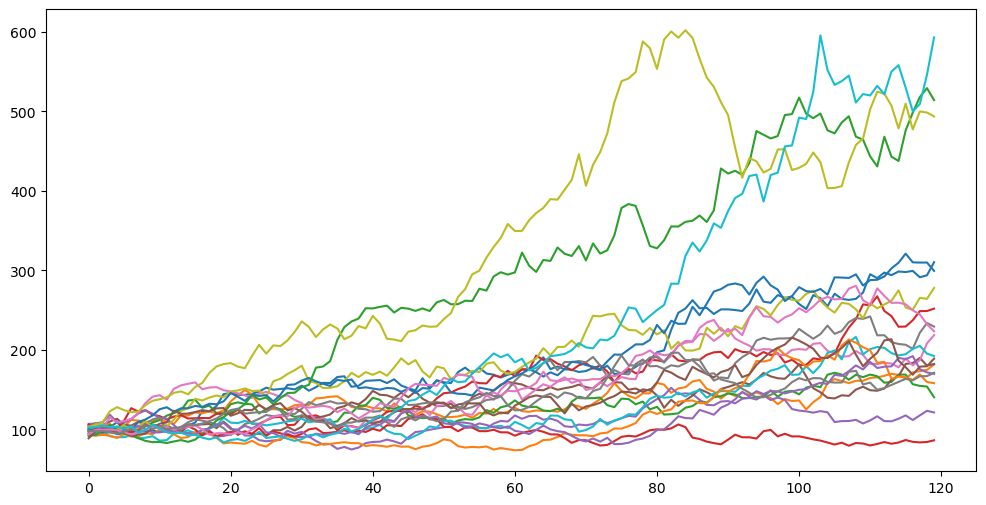

In [39]:
gbm(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))

In [40]:
def gbm(n_years = 10, n_scenarios = 1000, mu=0.07, sigma = 0.15, steps_per_year = 12, s_0 = 100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year) # make it an integer for format 
    rets_p1 = np.random.normal(loc = (1+mu*dt), scale = (sigma*np.sqrt(dt)), size=(n_steps, n_scenarios)) # generating a matrix as many rows as there are steps, and as many columns as there are scenarios 
    rets_p1[0] = 1
    # Returns to prices:
    prices = s_0*pd.DataFrame(rets_p1).cumprod()
    return prices

<AxesSubplot:>

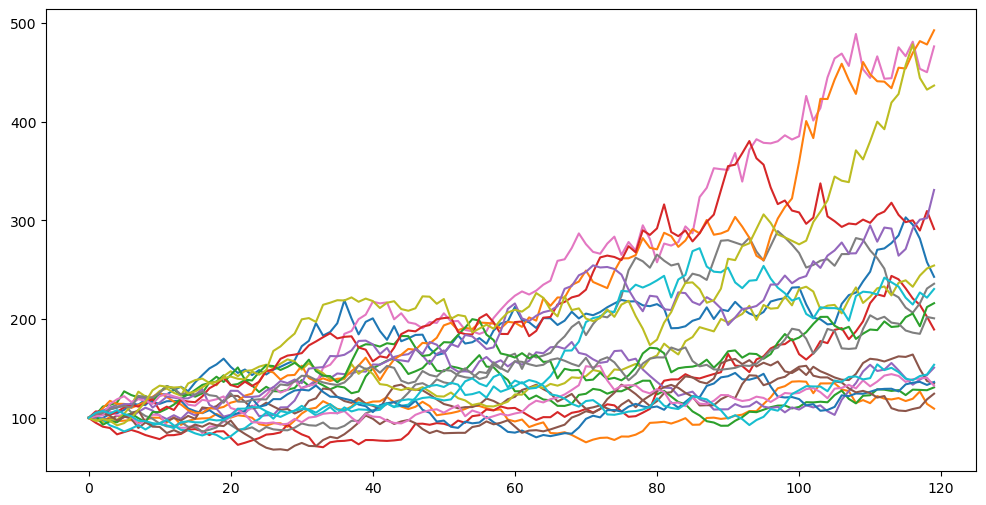

In [41]:
gbm(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))

In [42]:
gbm(n_scenarios=10).head()

,0,1,2,3,4,5,6,7,8,9
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,97.891541,101.634175,102.633916,95.942392,96.639476,102.880343,101.316646,102.325401,105.867380,105.494685
2,94.810076,110.053429,105.011918,89.266992,97.818961,115.193174,97.201056,104.475261,110.441840,106.621696
3,94.819461,113.365368,102.159469,86.247890,96.297451,109.493737,96.883716,102.675807,112.910634,107.479468
4,90.636368,107.195819,106.298487,88.945389,97.208473,117.817534,100.421064,102.967528,112.461448,104.988546
